In [1]:
# Gaussian pdf with parameters mu and sigma^2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate

probability to fall between -1.5707963267948966 and 1.5707963267948966 : 0.883770034433181


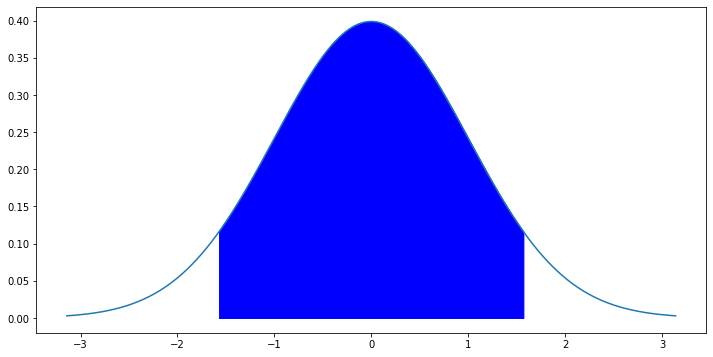

In [10]:
# simulation of pdf model
mean = 0
distribution_function = lambda x: norm.pdf(x, mean)

# probability calculation P(xmin < x < xmax)
xmin = -np.pi/2; xmax = np.pi/2
print('probability to fall between {0} and {1} :'.format(xmin, xmax), integrate.quad(distribution_function, xmin, xmax)[0])
step = 0.001 # computation step
whole_x = np.arange(-np.pi, np.pi, step)
whole_y = distribution_function(whole_x)

needed_x = np.arange(xmin, xmax, step)
needed_y = distribution_function(needed_x)
plt.figure(figsize=(12,6))
plt.plot(whole_x, whole_y)
plt.fill_between(needed_x, needed_y, color='blue')
plt.show()

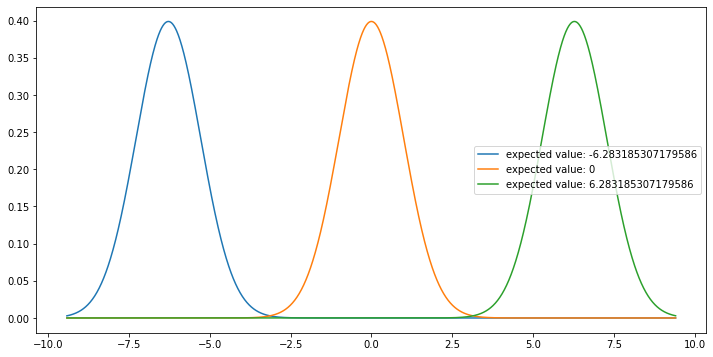

In [3]:
sigma = 1
xs = np.arange(-3*np.pi, 3*np.pi, 0.01)

plt.figure(figsize=(12,6))
for e_v in [-2*np.pi, 0, 2*np.pi]:
    plt.plot(
        xs,
        norm.pdf(xs, e_v, sigma),
        label='expected value: {0}'.format(e_v)
    )
plt.legend()
plt.show()

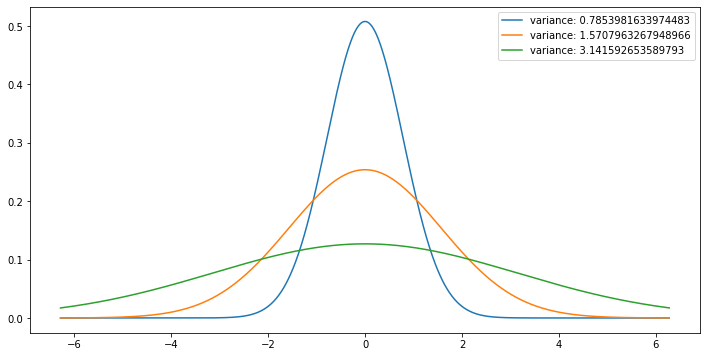

In [4]:
mu = 0
xs = np.arange(-2*np.pi, 2*np.pi, 0.01)

plt.figure(figsize=(12,6))
for variance in [np.pi/4, np.pi/2, np.pi]:
    plt.plot(
        xs,
        norm.pdf(xs, mu, variance),
        label='variance: {0}'.format(variance)
    )
plt.legend()
plt.show()

In [5]:
# Central limit theorem

# Let $\{x_k: k in K}$ be a sequence of independent and identically distributed (iid) 
# random variables of finite mean mu and  standard deviation  sigma^2

# Central Limit Theorem (CLT) says that the sum of iid random variables will 
# always converge to a Gaussian distribution with mean mu and standard deviation 
# sigma/sqrt(sample size)
# https://rajeshrinet.github.io/blog/2014/central-limit-theorem/

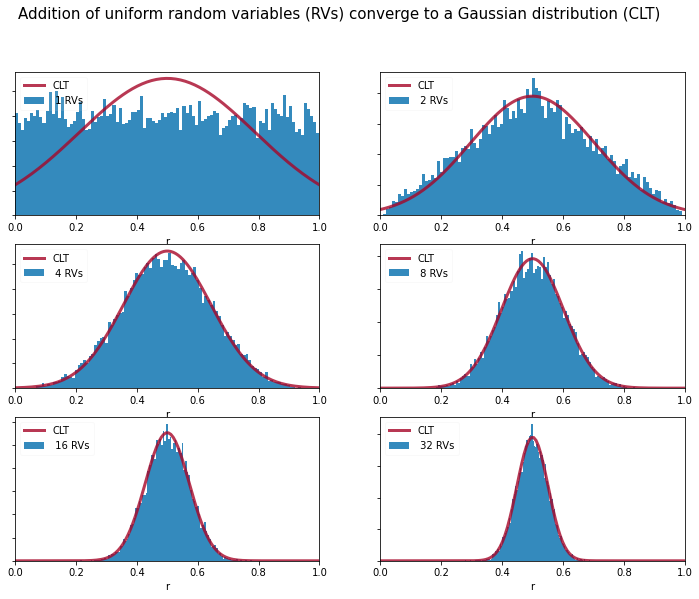

In [6]:
# Adding uniform distributed RVs
def plotHist(nr, NSample, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((NSample))
    sp = f.add_subplot(3, 2, n_ )
    
    for i in range(NSample):    
        for j in range(nr):
            x[i] += np.random.random()  # uniform pdf [+ 0.5]
        x[i] *= 1/nr
    plt.hist(x, 100, density=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(sp.get_yticklabels(), visible=False)
    
    variance = var0/nr                     
    fac = 1/np.sqrt(2*np.pi*variance)
    dist = fac*np.exp(-(x0-mean)**2/(2*variance))
    plt.plot(x0,dist,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    plt.xlabel('r')
    plt.xlim([0, 1])
    leg = plt.legend(loc="upper left")
    leg.get_frame().set_alpha(0.1)
   
NSample = 10000   # number of samples 
nr = ([1, 2, 4, 8, 16, 32]) # number of added random [uniform] variables (RV)
mean, var0 = 0.5, 1.0/12    # mean and variance of uniform distribution in range 0, 1
                            # [1, 1.0/12] in range 0.5, 1.5
x0 = np.linspace(0, 1, 128) # support

f = plt.figure(figsize=(12, 9))

for i in range(np.size(nr)):
    plotHist(nr[i], NSample, i+1, mean, var0, x0)

plt.suptitle("Addition of uniform random variables (RVs) converge to a Gaussian distribution (CLT)",fontsize=15);

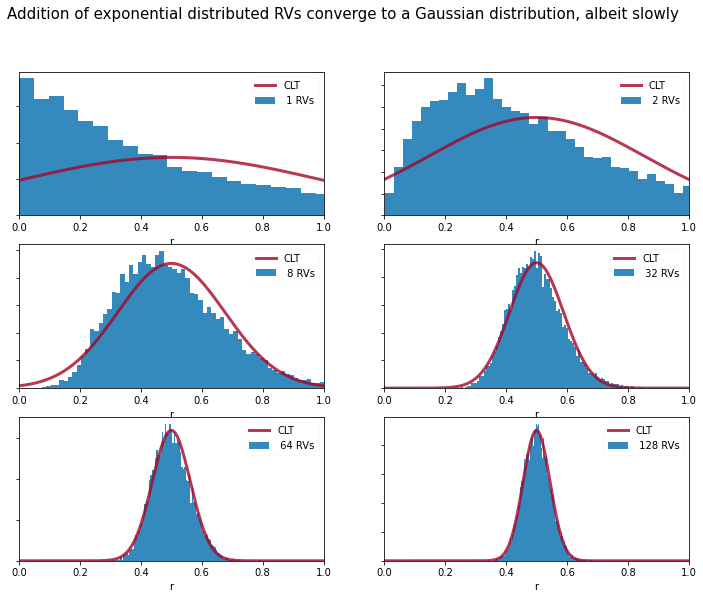

In [7]:
# Adding exponential distributed RVs
 
def plotHist(nr, NSample, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((NSample))
    sp = f.add_subplot(3, 2, n_ )
    
    for i in range(NSample):    
        for j in range(nr):
            x[i] += np.random.exponential(mean) 
        x[i] *= 1/nr
    plt.hist(x, 100, density=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(sp.get_yticklabels(), visible=False)
    
    variance = var0/nr                     
    fac = 1/np.sqrt(2*np.pi*variance)
    dist = fac*np.exp(-(x0-mean)**2/(2*variance))
    plt.plot(x0,dist,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    plt.xlabel('r')
    plt.xlim([0, 1])
    leg = plt.legend(loc="upper right")
    leg.get_frame().set_alpha(0.1)

nr = ([1, 2, 8, 32, 64, 128])

mean, var0 = 0.5, 0.5*0.5   # mean and variance  
# mean, var0 = 1, 0.5*0.5*2  [shift    0.5]
x0 = np.linspace(0, 1, 128)

f = plt.figure(figsize=(12, 9))
for i in range(np.size(nr)):
    plotHist(nr[i], NSample, i+1, mean, var0, x0)

plt.suptitle("Addition of exponential distributed RVs converge to a Gaussian distribution, albeit slowly",fontsize=15);

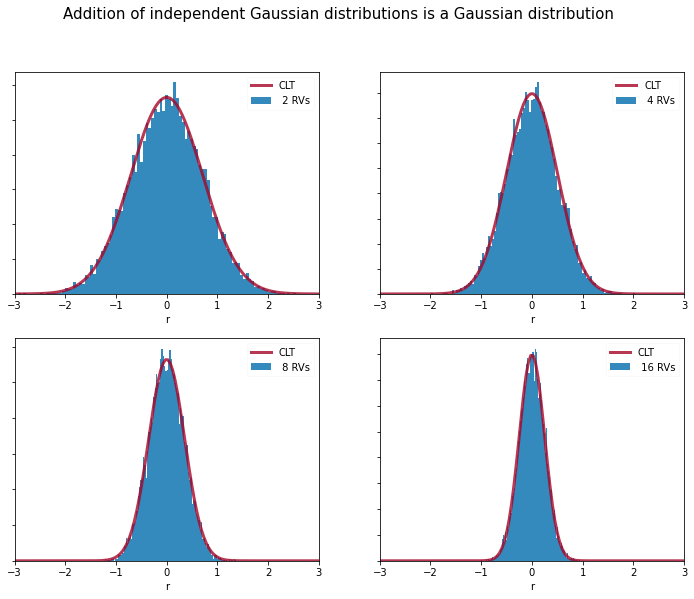

In [8]:
# adding Gaussian pdfs
 
def plotHist(nr, NSample, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((NSample))
    sp = f.add_subplot(2, 2, n_ )
    
    for i in range(NSample):    
        for j in range(nr):
            x[i] += np.random.randn() 
        x[i] *= 1/nr
    plt.hist(x, 100, density=True, color='#348ABD', label=" %d RVs"%(nr));
    plt.setp(sp.get_yticklabels(), visible=False)
    
    variance = var0/nr                     
    fac = 1/np.sqrt(2*np.pi*variance)
    dist = fac*np.exp(-(x0-mean)**2/(2*variance))
    plt.plot(x0,dist,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    plt.xlabel('r')
    plt.xlim([-3, 3])
    leg = plt.legend(loc="upper right")
    leg.get_frame().set_alpha(0.1)

nr = ([2, 4, 8, 16])

mean, var0 = 0, 1 # mean and variance  
x0 = np.linspace(-3, 3, 128)

f = plt.figure(figsize=(12, 9))
for i in range(np.size(nr)):
    plotHist(nr[i], NSample, i+1, mean, var0, x0)

plt.suptitle("Addition of independent Gaussian distributions is a Gaussian distribution",fontsize=15);

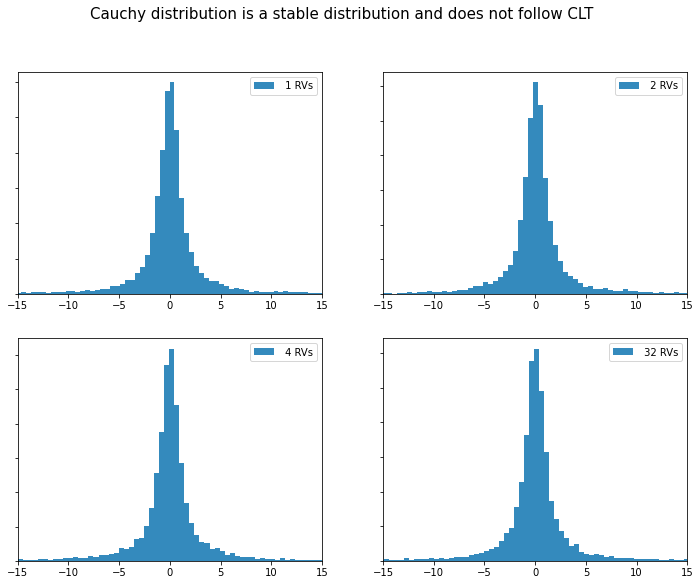

In [9]:
# adding Cauchy distributions
 
def plotHist(nr, NSample, n_, mean, var0, x0):
    ''' plots the RVs'''
    x = np.zeros((NSample))
    sp = f.add_subplot(2, 2, n_)
    
    for i in range(NSample):    
        for j in range(nr):
            x[i] += np.random.standard_cauchy() 
        x[i] *= 1/nr
    x = x[(x>-25) & (x<25)]  # to get a proper plot
    plt.hist(x, 100, density=True, color='#348ABD', label=" %d RVs"%(nr));
    
    plt.xlim([-15, 15])
    leg = plt.legend(loc="upper right")
    plt.setp(sp.get_yticklabels(), visible=False)

nr = ([1, 2, 4, 32])

mean, var0 = 0, 1  # mean and variance 
x0 = np.linspace(0, 1, 128)

f = plt.figure(figsize=(12, 9))
for i in range(np.size(nr)):
    plotHist(nr[i], NSample, i+1, mean, var0, x0)

plt.suptitle("Cauchy distribution is a stable distribution and does not follow CLT",fontsize=15);